input: open price, close price and volumn of previous day & open price of this day

output: close price of today

model: linear regression

In [64]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\lenovo\Anaconda33\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
price = pd.read_csv('prices.csv')
price.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [3]:
price['date'] = pd.to_datetime(price['date'])
price.dtypes

date      datetime64[ns]
symbol            object
open             float64
close            float64
low              float64
high             float64
volume           float64
dtype: object

In [91]:
company = price[price['symbol']=='WLTW']#MSFT
company.head()

,date,symbol,open,close,low,high,volume
251,2010-01-04,A,31.389999,31.300001,31.130000,31.630001,3815500.0
718,2010-01-05,A,31.209999,30.960001,30.760000,31.220001,4186000.0
1186,2010-01-06,A,30.850001,30.850001,30.760000,31.000001,3243700.0
1654,2010-01-07,A,30.780001,30.809999,30.500000,30.820001,3095100.0
2122,2010-01-08,A,30.640000,30.800000,30.399999,30.850001,3733900.0


In [92]:
closeStock = company.close.values.astype('float32')
closeStock = closeStock.reshape(len(closeStock), 1)
closeStock

array([[ 31.30000114],
       [ 30.96000099],
       [ 30.85000038],
       ..., 
       [ 45.72000122],
       [ 45.63999939],
       [ 45.56000137]], dtype=float32)

In [93]:
openStock = company.open.values.astype('float32')
openStock = openStock.reshape(len(openStock), 1)
openStock

array([[ 31.38999939],
       [ 31.20999908],
       [ 30.85000038],
       ..., 
       [ 46.50999832],
       [ 45.68000031],
       [ 45.75999832]], dtype=float32)

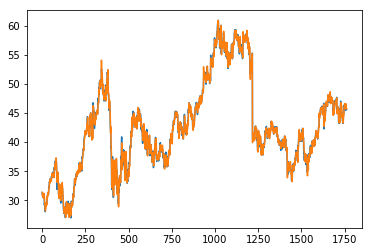

In [94]:
fig = plt.figure()
plt.plot(closeStock)
plt.plot(openStock)
plt.show()

In [95]:
scaler = MinMaxScaler(feature_range=(0, 1))
openStock = scaler.fit_transform(openStock)
closeStock = scaler.fit_transform(closeStock)

In [108]:
#train_index = 
import random
random_index=list(range(company.shape[0]))
random.sample(random_index[0:10],int(0.7*company.shape[0]))

ValueError: Sample larger than population or is negative

In [96]:
train_size = int(len(openStock) * 0.7)
test_size = len(openStock) - train_size

#train, test = openStock[0:train_size,:], openStock[train_size:len(openStock),:]
#print(len(train), len(test))

company.index = range(company.shape[0])
input1=pd.DataFrame(company.open[0:len(company.open)-1])
input2=pd.DataFrame(company.open[1:len(company.open)])
input3=pd.DataFrame(company.close[0:len(company.close)-1])
input4=pd.DataFrame(company.volume[0:len(company.close)-1])
input1.columns=['open1']
input2.columns=['open2']
input3.columns=['close1']
input4.columns=['volume1']
input2.index = range(input2.shape[0])
input_all = input1.join(input2)
input_all = input_all.join(input3).join(input4)
input_all.tail()

,open1,open2,close1,volume1
1756,45.930000,46.080002,45.970001,968300.0
1757,46.080002,46.369999,46.200001,727700.0
1758,46.369999,46.509998,46.509998,1535500.0
1759,46.509998,45.680000,45.720001,1177300.0
1760,45.680000,45.759998,45.639999,891000.0


In [97]:
output_all = pd.DataFrame(company.close[1:len(company.close)])
output_all.index = range(output_all.shape[0])
output_all.tail()

,close
1756,46.200001
1757,46.509998
1758,45.720001
1759,45.639999
1760,45.560001


In [98]:
trainX, testX = input_all.ix[0:train_size,:], input_all.ix[train_size:len(openStock),:]
print(trainX.shape, testX.shape)
trainY, testY = output_all.ix[0:train_size,:], output_all.ix[train_size:len(openStock),:]
print(trainY.shape, testY.shape)
trainX = np.array(trainX)
testX = np.array(testX)
trainY = np.array(trainY)
testY = np.array(testY)

(1234, 4) (528, 4)
(1234, 1) (528, 1)


In [99]:
# fit model
lm = linear_model.LinearRegression()
lm.fit(trainX, trainY)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

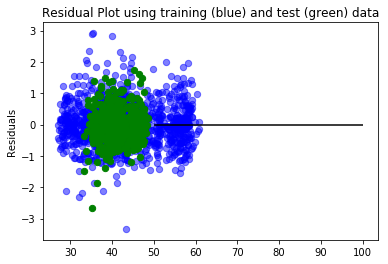

In [100]:
#residual plot
plt.scatter(lm.predict(trainX),lm.predict(trainX)-trainY,c='b',s=40,alpha=0.5)
plt.scatter(lm.predict(testX),lm.predict(testX)-testY,c='g',s=40)
plt.hlines(y=0,xmin=50,xmax=100)
plt.title('Residual Plot using training (blue) and test (green) data')
plt.ylabel('Residuals')

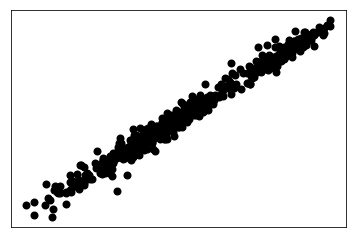

In [101]:
#plt.scatter(testX, testY,  color='blue')
plt.scatter(testY, lm.predict(testX), color='black',linewidth=2)

plt.xticks(())
plt.yticks(())

plt.show()

In [102]:
# The coefficients
print('Coefficients: \n', lm.coef_)
# The mean squared error
print("Mean squared error: %.8f"
      % np.mean((lm.predict(testX) - testY) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.8f' % lm.score(testX, testY))

Coefficients: 
 [[ -2.27244220e-02   1.01712695e+00   2.87617028e-03   6.39714311e-09]]
Mean squared error: 0.25670881
Variance score: 0.97917904


In [88]:
# ??? range for R2, Mean square error